In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [6]:
data_url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [8]:

x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=1/8, random_state=42)


In [12]:
print("X:" ,X.shape)
print("Y:", y.shape)


X: (506, 13)
Y: (506,)


In [41]:
lasso = Lasso().fit(x_train, y_train)
ridge = Ridge().fit(x_train, y_train)
print("Lasso Coefficient:", *lasso.coef_, sep="\n\t")
print('Ridge Coefficient:', *ridge.coef_, sep="\n\t")
print("Сумма абсолютных значений коэффициентов lasso:", np.sum(np.abs(lasso.coef_)))
print("Сумма абсолютных значений коэффициентов ridge:", np.sum(np.abs(ridge.coef_)))


Lasso Coefficient:
	-0.08532814000977827
	0.027958410554584454
	-0.0
	0.0
	-0.0
	2.3129943034501195
	0.010560740599393284
	-0.6764302360206214
	0.1842049869711683
	-0.011061815910052342
	-0.7209278599168264
	0.011678045544334475
	-0.6684419375990314
Ridge Coefficient:
	-0.11209603391779442
	0.03342484715002954
	0.020073408757658784
	2.458556959762607
	-9.302807754425011
	5.1869711366155355
	-0.01962102183243657
	-1.3565597223182233
	0.2136783875038084
	-0.010963595358500533
	-0.8194643181982197
	0.012865067834182089
	-0.44025677873693286
Сумма абсолютных значений коэффициентов lasso: 4.709586476575909
Сумма абсолютных значений коэффициентов ridge: 19.987339032410937


(13,)

<Figure size 640x480 with 0 Axes>

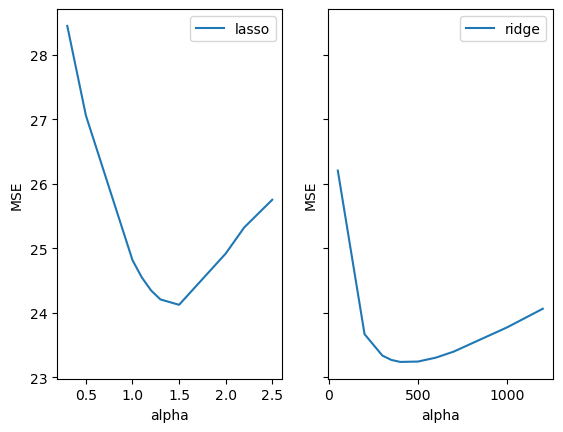

Найлучший коэффициент для Lasso: 1.5
Наилучший коэффициент для Ridge: 400


In [21]:
#Подбор параметра регуляризаци
lasso_alphas = [0.3, 0.5, 1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5]
ridge_alphas = [50, 200, 300, 350, 400, 500, 600, 700, 1000, 1200]
lasso_losses = []
ridge_losses = []
for i in range(len(lasso_alphas)):
    lasso = Lasso(alpha=lasso_alphas[i]).fit(x_train, y_train)

    y_pred = lasso.predict(x_val)
    mse_lasso = mean_squared_error(y_pred, y_val)
    lasso_losses.append(mse_lasso)

    ridge = Ridge(alpha=ridge_alphas[i]).fit(x_train, y_train)

    y_pred = ridge.predict(x_val)
    mse_ridge = mean_squared_error(y_pred, y_val)
    ridge_losses.append(mse_ridge)

plt.suptitle('Эффект от изменения альфа  на MSE для lasso и ridge')

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.plot(lasso_alphas, lasso_losses, label="lasso")
ax1.legend()
ax1.set(xlabel="alpha", ylabel="MSE")

ax2.plot(ridge_alphas, ridge_losses, label="ridge")
ax2.legend()
ax2.set(xlabel="alpha", ylabel="MSE")

plt.show()

lasso_best_alpha = lasso_alphas[np.argmin(lasso_losses)]
ridge_best_alpha = ridge_alphas[np.argmin(ridge_losses)]
print("Найлучший коэффициент для Lasso:", lasso_best_alpha)
print("Наилучший коэффициент для Ridge:", ridge_best_alpha)

In [22]:
lasso = Lasso(alpha=lasso_best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Lasso MSE на тестовом наборе:", mean_squared_error(y_test, y_pred))

ridge = Ridge(alpha=ridge_best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge MSE на тестовом наборе:", mean_squared_error(y_test, y_pred))

Lasso MSE на тестовом наборе: 25.624484407448573
Ridge MSE на тестовом наборе: 23.605477806920064


In [40]:
lasso_alphas = [1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5, 3, 5]
ridge_alphas = [100, 200, 300, 350, 400, 500, 600, 700, 1000, 1200, 2000, 3000]
lasso_coefs_ = np.zeros((len(lasso_alphas), len(X[0])))
ridge_coefs_ = np.zeros((len(ridge_alphas), len(X[0])))
for i in range(len(lasso_alphas)):
    lasso = Lasso(alpha=lasso_alphas[i])
    lasso.fit(x_train, y_train)
    lasso_coefs_[i] = lasso.coef_

for i in range(len(ridge_alphas)):
    rigde = Ridge(alpha=ridge_alphas[i])
    ridge.fit(x_train, y_train)
    ridge_coefs_[i] = ridge.coef_

for idx in range(len(X[0])):
    ax1.plot(lasso_alphas, lasso_coefs_[:, idx], label=f"feature{idx}")
ax1.legend()
ax1.set(xlabel='alpha', ylabel='coefs')

for idx in range(len(X[0])):
    ax2.plot(ridge_alphas, ridge_coefs_[:, idx], label=f"feature {idx}")
ax2.legend()
ax2.set(xlabel='alpha', ylabel='coefs')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [42]:
lasso_coefs_.shape

(10, 13)